In [ ]:
%matplotlib

In [ ]:
%matplotlib inline

## 라이브러리 import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

## 데이터 불러오기

In [2]:
Data = pd.read_csv('./ExampleData', sep=',', header=None)
Data.shape

(2774, 4)

## Time domain 그래프

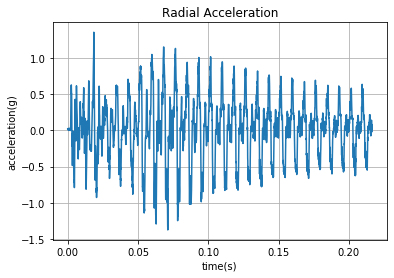

In [3]:
plt.plot(Data.iloc[:,0], Data.iloc[:,1])
plt.grid()
    # Data.iloc[:,0] : 시간열 // Data.iloc[:,1] : 신호열 (반경방향 가속도)
    # 데이터에 따라 맞추어 변경
plt.xlabel('time(s)')
plt.ylabel('acceleration(g)')
plt.title('Radial Acceleration')
#plt.xlim(0,0.2167)
plt.show()

## STFT 실행 (Spectrogram 생성)

In [21]:
Fs = 12800
x  = Data.iloc[:,1].values # 데이터의 신호열 선택(가속도 데이터)

In [18]:
f,t,Sxx = signal.spectrogram(x, Fs, nperseg = 78)
f.shape, t.shape, Sxx.shape

## STFT 그래프 (Frequency & Time domain)

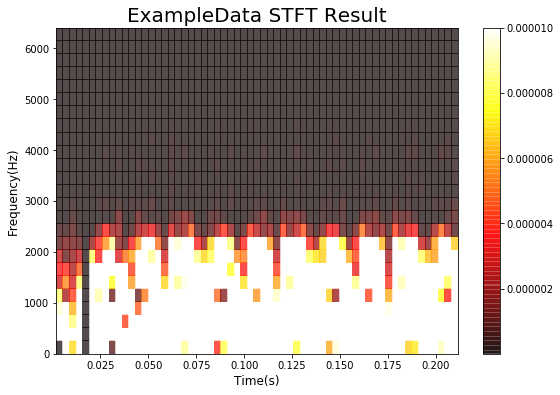

In [19]:
plt.figure(figsize=(9,6))
plt.pcolormesh(t, f, Sxx, vmax = 0.00001, cmap = 'hot', alpha = 0.7)
# plt.ylim((0, 6400))
# plt.xlim((0,0.144))
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('Frequency(Hz)', fontsize=12)
plt.title('ExampleData STFT Result', fontsize=20)
plt.colorbar()
plt.show()

In [22]:
result = pd.DataFrame(signal.spectrogram(x, Fs, nperseg = 50))
path = './ST55_Acc'   # path = '파일 경로//저장할 파일 이름'
result.to_csv(path, sep=',', header=None, index=None)